<a href="https://colab.research.google.com/github/shreehari117/ML-2/blob/master/Sureshbabu_Shree_Hari_aml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Name: Shree Hari Sureshbabu
#ECE 595 Machine Learning II
#Project 4: Adversarial Machine Learning - Student Code

In [1]:
#Install Cleverhans (version Cleverhans 2.1.0 is most compatable with Python 2.x)
!pip install cleverhans==2.1.0

     |████████████████████████████████| 71kB 2.3MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
  Created wheel for cleverhans: filename=cleverhans-2.1.0-cp27-none-any.whl size=74866 sha256=49dee789c82e980082319123944ffc0dcf3b9c2aaf566e3dbac8873bc593af37
  Stored in directory: /root/.cache/pip/wheels/5e/d5/ae/5bf57b9265bffd5783c4462a9a7c1c5fd0ebe51db83ff5f586
Successfully built cleverhans


In [2]:
#Import necessary packages
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense, BatchNormalization
from keras import backend
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.attacks import FastGradientMethod, MadryEtAl, DeepFool, CarliniWagnerL2

Using TensorFlow backend.


#Part 1: Training a target classifier

In [7]:
# Load data MNIST data and normalize to [0, 1]
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

#Reshape training and testing data into 784-dimensional vectors 
data_train = data_train.reshape(60000,784)
data_test = data_test.reshape(10000,784)

#Convert integer labels for training and testing data into one-hot vectors 
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

#Create classifier architecture, compile it, and train it
def classifier():
  model_classifier = Sequential()
  model_classifier.add(Dense(100, input_dim = 784, activation='relu'))
  model_classifier.add(BatchNormalization())
  model_classifier.add(Dense(100, activation='relu'))
  model_classifier.add(BatchNormalization())
  model_classifier.add(Dense(10, activation = 'softmax'))
  return model_classifier

model_classifier = classifier()
model_classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classifier_data = model_classifier.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=50, batch_size=256, shuffle=True)
score = model_classifier.evaluate(data_test, labels_test)

W1106 14:46:38.737947 140337710856064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1106 14:46:38.762284 140337710856064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W1106 14:46:38.891858 140337710856064 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1106 14:46:39.168756 140337710856064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add inste

Train on 60000 samples, validate on 10000 samples
Epoch 1/50


W1106 14:46:40.656203 140337710856064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1106 14:46:40.657736 140337710856064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W1106 14:46:40.866182 140337710856064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



60000/60000 [==============================] - 8s 125us/step - loss: 0.3038 - acc: 0.9109 - val_loss: 0.1410 - val_acc: 0.9593
Epoch 2/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1123 - acc: 0.9665 - val_loss: 0.1113 - val_acc: 0.9646
Epoch 3/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0766 - acc: 0.9772 - val_loss: 0.0920 - val_acc: 0.9719
Epoch 4/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0558 - acc: 0.9836 - val_loss: 0.0827 - val_acc: 0.9746
Epoch 5/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.0414 - acc: 0.9877 - val_loss: 0.0991 - val_acc: 0.9704
Epoch 6/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0338 - acc: 0.9901 - val_loss: 0.0884 - val_acc: 0.9732
Epoch 7/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0262 - acc: 0.9926 - val_loss: 0.1030 - val_acc: 0.9699
Epoch 8/50
60000/60000 [===========================

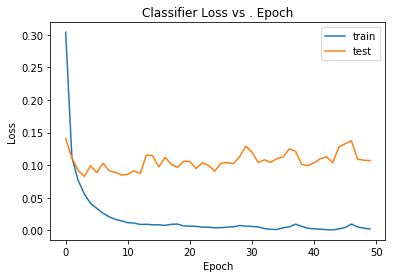

In [8]:
#Plot loss vs epoch
plt.plot(model_classifier_data.history['loss'])
plt.plot(model_classifier_data.history['val_loss'])
plt.title('Classifier Loss vs . Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

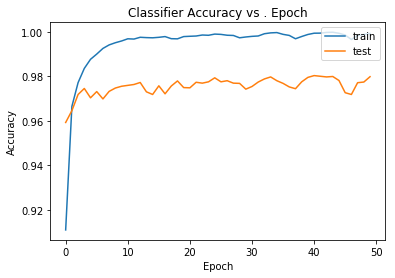

In [9]:
#Plot accuracy vs epoch
plt.plot(model_classifier_data.history['acc'])
plt.plot(model_classifier_data.history['val_acc'])
plt.title('Classifier Accuracy vs . Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [10]:
#Print accuracy of classifier on MNIST testing data
print("Accuracy : %.2f%%" %(score[1]*100))

Accuracy : 97.99%


In [0]:
# Edit the classifier name fed into KerasModel Wrapper with the name of the 
# classifier from above and then run this block

#Get TensorFlow Session to pass into Cleverhans modules
sess = backend.get_session()

#Create wrapper for classifier model so that it can be passed into Cleverhans modules
wrap = KerasModelWrapper(model_classifier)

#Part 2: The Fast Gradient Method (FGM)

In [0]:
#Implementing the FGSM attack

#FGM Instance on trained classifier from Part 1
#FILL THIS IN

#Attack parameters
#FILL THIS IN

#Generate adversarial data
#FILL THIS IN

#Evaluate accuracy on target classifier 
#FILL THIS IN


In [0]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN

In [0]:
#Implementing Detection via Autoencoders

def autoencoder():
    ae = Sequential()
    ae.add(Dense(400, activation=None, kernel_initializer="normal", input_dim=784))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(100, activation=None, kernel_initializer='normal'))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(400, activation=None, kernel_initializer='normal'))
    ae.add(Dense(784, activation='sigmoid', kernel_initializer='normal'))
    return ae

#Create and train the autoencoder using the mean squared error loss and adam optimizer
#FILL THIS IN

In [0]:
#Using the autoencoder for detection and to determine a threshold 

# Create adversarial examples using FGSM on training data
#FILL THIS IN

# Obtain reconstruction errors on training set and determine a threshold 
#FILL THIS IN

# Convert error tensor into NumPy array 
# CHANGE NAME 'error' TO WHAT YOU CALLED IT ABOVE
error = error.eval(session=sess)

# Determine threshold (based on min in this case) and print it 
#FILL THIS IN

# Calculate error of adversarial testing set
#FILL THIS IN

# Determine how many examples are above threshold and consider them adversarial
# (true positive count)
# Hint: Use a 'for' loop to compare each error value to the threshold
#FILL THIS IN

# Print number of true positive samples
#FILL THIS IN  

# Determine false positives on benign testing set
#FILL THIS IN 


# Determine how many examples are above threshold and consider them adversarial
# (false positive count)
# Hint: Use a 'for' loop to compare each error value to the threshold
#FILL THIS IN 
    
# Print number of false positive samples
#FILL THIS IN   

#Part 3: Projected Gradient Descent

In [0]:
#Implementing the PGD attack

#PGD Instance on trained classifier from Part 1
pgd = MadryEtAl(wrap, sess=sess)

#Attack parameters
#FILL THIS IN

#Generate adversarial data
#FILL THIS IN

#Evaluate accuracy of perturbed data on target classifier
#FILL THIS IN

In [0]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN 

In [0]:
#Implementing the adversarial training defense
#FILL THIS IN

In [0]:
#Using the defense to evaluate the accuracy of the perturbed data
#FILL THIS IN 

#Part 4: Carlini and Wagner Attack

In [0]:
#Implementing the CW attack

#CW Instance on trained classifier from Part 1
#FILL THIS IN


#Attack parameters
#FILL THIS IN


#Generate adversarial data
#FILL THIS IN


#Evaluate accuracy of perturbed data on target classifier
#FILL THIS IN

In [0]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN 

In [0]:
#Implementing the dimensionality reduction (PCA) defense 

#Calculate PCA projection
pca = PCA(100)
pca.fit(data_train)
pca_train = pca.transform(data_train)
pca_test = pca.transform(data_test)

#Transform perturbed CW data using the subspace from the original training data
#FILL THIS IN 

# create model for PCA
def pca_model():
    model = Sequential()
    
    #FILL THIS IN 

    return model

#Create model graph, compile it, and train it using pca_train lables_train 
#FILL THIS IN 

In [0]:
#Using the defense (and comparing to baseline accuracy)
#FILL THIS IN 

#Part 5: DeepFool 

In [0]:
#Implementing the DeepFool attack

#DeepFool Instance on trained classifier from Part 1
#FILL THIS IN


#Attack parameters
#FILL THIS IN


#Generate adversarial data
#FILL THIS IN


#Evaluate accuracy of perturbed data on target classifier
#FILL THIS IN

In [0]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN

In [0]:
#Implementing the Denoising Autoencoder Defense

def autoencoder():
    ae = Sequential()
    ae.add(Dense(400, activation=None, kernel_initializer="normal", input_dim=784))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(100, activation=None, kernel_initializer='normal'))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(400, activation=None, kernel_initializer='normal'))
    ae.add(Dense(784, activation='sigmoid', kernel_initializer='normal'))
    return ae

#Create training data for DAE 
df_attack_data_train = deepfool.generate_np(data_train, **fgm_params)
data_total_train = np.concatenate([df_attack_data_train, data_train])

#Create and train DAE graph
#FILL THIS IN

In [0]:
#Using the defense

#Use DAE to to remove adversarial perturbation 
#FILL THIS IN

#Evaluate accuracy of FGM samples after denoising 
#FILL THIS IN

In [0]:
#Show ten samples of adversarial samples after denoising
#FILL THIS IN